<a href="https://colab.research.google.com/github/Sukoluhle-Dube/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portfolio with Apple, Netflix, Google, Amazon, and Tesla.

[*********************100%***********************]  5 of 5 completed


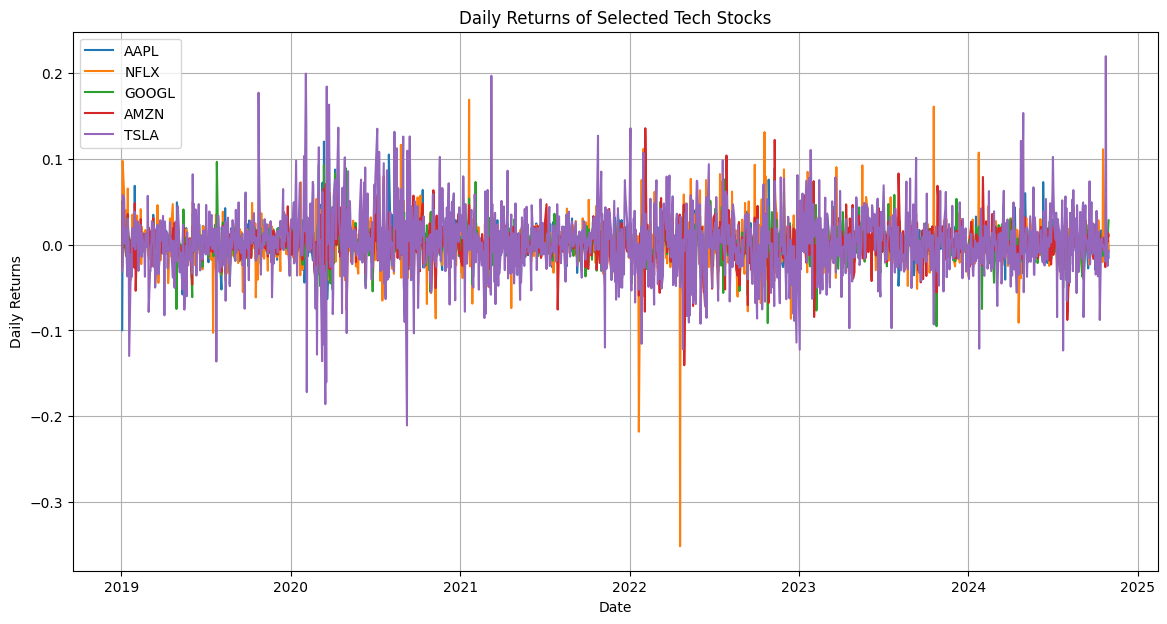

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of asset tickers
tickers = ['AAPL', 'NFLX', 'GOOGL', 'AMZN', 'TSLA']

# Download historical price data for the last 5 years
data = yf.download(tickers, start='2019-01-01', end='2024-10-31')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Plot the daily returns
plt.figure(figsize=(14, 7))

# Plot each asset's returns
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title('Daily Returns of Selected Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()
plt.show()


Initial Capital: $5
Expected Profit: $3.41
Potential Loss Due to Volatility: $0.18

Initial Capital: $100
Expected Profit: $68.10
Potential Loss Due to Volatility: $3.63

Initial Capital: $1000
Expected Profit: $681.02
Potential Loss Due to Volatility: $36.34

Initial Capital: $10000
Expected Profit: $6810.24
Potential Loss Due to Volatility: $363.36

Optimal Portfolio Weights:
AAPL: 31.34%
MSFT: 2.69%
GOOGL: 30.50%
AMZN: 0.00%
TSLA: 35.48%

Expected Return over 5 Years: 68.10%
Calculated Annual Return: 13.62%
Annual Volatility: 3.63%
Sharpe Ratio: 18.47


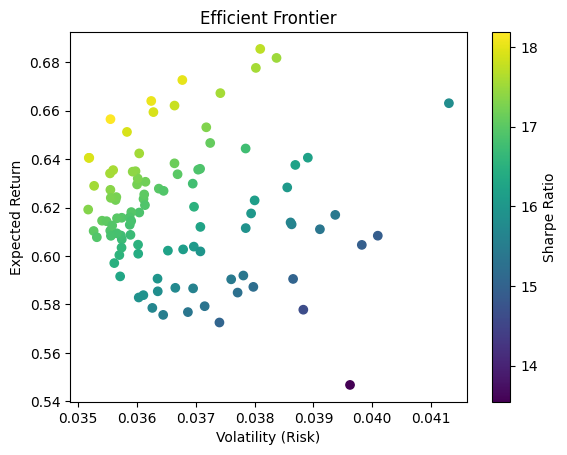

In [ ]:
# Import necessary libraries
import numpy as np                  # For numerical operations
import pandas as pd                 # For data manipulation (not used explicitly here)
import matplotlib.pyplot as plt      # For plotting graphs
from scipy.optimize import minimize  # For optimization functions

# Sample data: Hypothetical expected returns and covariance matrix for assets
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # List of asset tickers
mean_returns = np.array([0.12, 0.10, 0.14, 0.11, 0.15])  # Expected annual returns for the assets
cov_matrix = np.array([               # Covariance matrix representing asset return variances and covariances
    [0.0004, 0.0002, 0.0001, 0.0003, 0.0002],
    [0.0002, 0.0005, 0.00015, 0.00025, 0.0002],
    [0.0001, 0.00015, 0.0006, 0.0001, 0.00015],
    [0.0003, 0.00025, 0.0001, 0.0004, 0.0003],
    [0.0002, 0.0002, 0.00015, 0.0003, 0.0005]
])

# Function to calculate portfolio performance (returns and volatility)
def portfolio_performance(weights, mean_returns, cov_matrix, investment_duration):
    # Calculate expected portfolio return based on investment duration
    returns = np.sum(mean_returns * weights) * investment_duration  # Annualized return adjusted for duration
    # Calculate portfolio volatility (standard deviation, adjusted for duration)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(investment_duration)
    return returns, volatility  # Return both expected returns and volatility

# Function to calculate annual returns based on weights
def calculate_annual_returns(weights, mean_returns):
    # Annual return is simply the dot product of weights and mean returns
    annual_return = np.sum(weights * mean_returns)
    return annual_return  # Return the annual returns

# Objective function to minimize (negative Sharpe Ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, investment_duration, risk_free_rate=0.01):
    # Calculate portfolio performance based on the provided weights
    p_returns, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix, investment_duration)
    # Return the negative Sharpe ratio to minimize
    return -(p_returns - risk_free_rate) / p_volatility

# Constraints and bounds for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Ensure weights sum to 1
bounds = tuple((0, 1) for asset in range(len(assets)))  # No short selling (weights between 0 and 1)

# Initial guess for weights (equal distribution among assets)
initial_weights = np.array(len(assets) * [1. / len(assets)])  # Start with equal weights

# Define investment duration (in years)
investment_duration = 5  # Change this to 5/12 for 5 months

# Optimize the portfolio to find the best weights
optimal = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, investment_duration),
                   method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimal weights and calculate expected return and volatility
optimal_weights = optimal.x
expected_return, annual_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix, investment_duration)
annual_return = calculate_annual_returns(optimal_weights, mean_returns)  # Calculate annual returns
sharpe_ratio = -(optimal.fun)  # Convert back to positive Sharpe ratio

# Define initial capital amounts
initial_capitals = [5, 100, 1000, 10000]  # Different initial capital amounts

# Calculate profit or loss for each capital amount based on expected annual return and volatility
for capital in initial_capitals:
    # Calculate expected profit
    expected_profit = capital * expected_return
    # Calculate potential loss based on volatility
    potential_loss = capital * annual_volatility  # Use volatility to estimate risk
    print(f"\nInitial Capital: ${capital}")
    print(f"Expected Profit: ${expected_profit:.2f}")
    print(f"Potential Loss Due to Volatility: ${potential_loss:.2f}")

# Print the results for optimal portfolio
print("\nOptimal Portfolio Weights:")
for asset, weight in zip(assets, optimal_weights):
    print(f"{asset}: {weight:.2%}")  # Print each asset's weight in percentage format

print(f"\nExpected Return over {investment_duration} Years: {expected_return:.2%}")  # Print expected return
print(f"Calculated Annual Return: {annual_return:.2%}")   # Print calculated annual return
print(f"Annual Volatility: {annual_volatility:.2%}")      # Print annual volatility
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")                 # Print Sharpe ratio

# Function to generate the Efficient Frontier
def efficient_frontier(mean_returns, cov_matrix, investment_duration, points=100):
    results = np.zeros((3, points))  # Array to store results: returns, volatility, Sharpe ratios
    weights_record = []               # List to record weights of each portfolio

    # Generate random portfolios
    for i in range(points):
        weights = np.random.random(len(assets))  # Create random weights
        weights /= np.sum(weights)  # Normalize weights so that they sum to 1
        weights_record.append(weights)  # Record the weights
        # Calculate portfolio performance
        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix, investment_duration)
        # Store results
        results[0, i] = portfolio_return  # Expected return
        results[1, i] = portfolio_volatility  # Volatility
        results[2, i] = (portfolio_return - 0.01) / portfolio_volatility  # Sharpe ratio

    return results, weights_record  # Return results and weight records

# Call the function to get Efficient Frontier results
results, weights_record = efficient_frontier(mean_returns, cov_matrix, investment_duration)

# Plotting the Efficient Frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')  # Scatter plot
plt.colorbar(label='Sharpe Ratio')  # Color bar to indicate Sharpe ratio
plt.xlabel('Volatility (Risk)')  # Label for x-axis
plt.ylabel('Expected Return')  # Label for y-axis
plt.title('Efficient Frontier')  # Title of the plot
plt.show()  # Display the plot